#  Predicting heart Disease using machine learning

This notebook looks into using various python based ml and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We 'r going to take the following approach:
1. Problem Definition 
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1. Problem Def.
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease ?
## 2. Data
The original data came from the cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease
There is also a version of it available on Kaggle https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## 4. Features
> This is where you will get different information about each of the features in your data.

**Data Dictionary**
* age
age in years

* sex
(1 = male; 0 = female)

* cp
chest pain type

* trestbps
resting blood pressure (in mm Hg on admission to the hospital)

* chol
serum cholestoral in mg/dl

* fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

* restecg
resting electrocardiographic results

* thalach
maximum heart rate achieved

* exang
exercise induced angina (1 = yes; 0 = no)

* oldpeak
ST depression induced by exercise relative to rest

## Preparing tools

Going to use pandas, Matplotlib and Numpy for data analysis and manipulation 

In [1]:
# Import all tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To get plots to appear inside notebook
%matplotlib inline

# Models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Loading Data

In [2]:
# loading our data
data = pd.read_csv("heart-disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Explore data (EDA: Exploratory Data Analysis)

Finding more about the data and becoming subject matter expert on the dataset.

1. What Questions are we trying to solve?
2. What kind of data do we have and how to deal with different types ?
3. What's missing from the data and how to deal with it ?
4. Where are the outliers and why should we care about them?
5. what features can you add, remove or change to get more of the data?

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
## finding count for each class
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

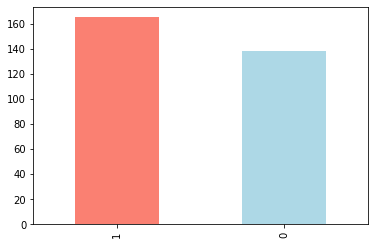

In [6]:
data["target"].value_counts().plot(kind = "bar",color=["salmon","lightblue"]);

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
## check missing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# finding patterns 

# lets analyse the relation of getting heart disease with type of chest pain the person has\
data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [11]:
pd.crosstab(data.target,data.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

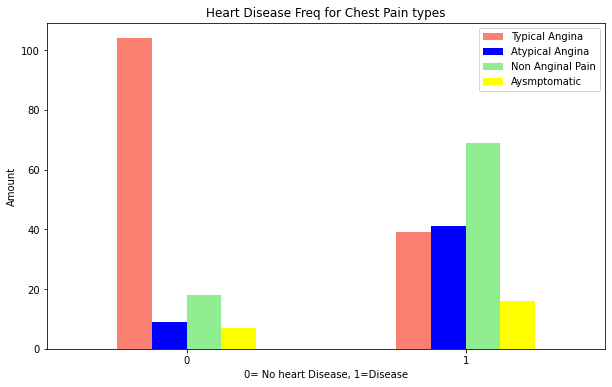

In [12]:
# create plot of crosstab
pd.crosstab(data.target,data.cp).plot(kind="bar",
                                     figsize=(10,6),
                                     color=['salmon','blue','lightgreen','yellow']);
plt.title("Heart Disease Freq for Chest Pain types")
plt.xlabel("0= No heart Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Typical Angina","Atypical Angina","Non Anginal Pain","Aysmptomatic"])
plt.xticks(rotation=0)

In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
data["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

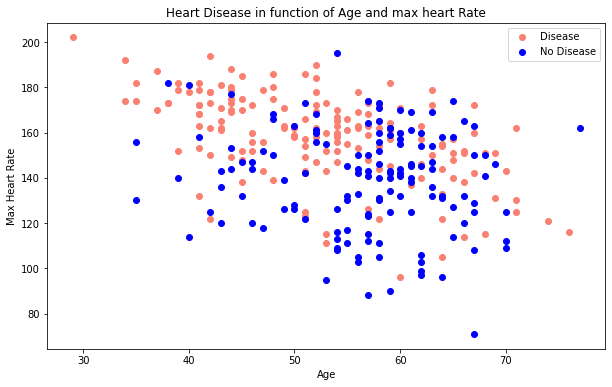

In [15]:
## Age vs MAx Heart_Rate for Heart Disease
# create figure
plt.figure(figsize=(10,6))

# scatter with positive example
plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],
            c="salmon");
# scatter with negative examples
plt.scatter(data.age[data.target == 0],
           data.thalach[data.target==0],
           c="blue");
# Add some info to plot
plt.title("Heart Disease in function of Age and max heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

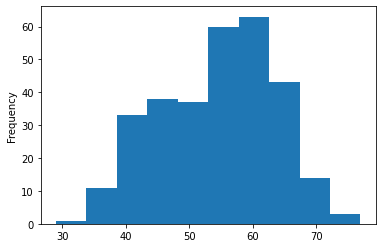

In [16]:
# check Distribution of age with histogram
data.age.plot.hist();

In [17]:
# Corelation matrix 
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


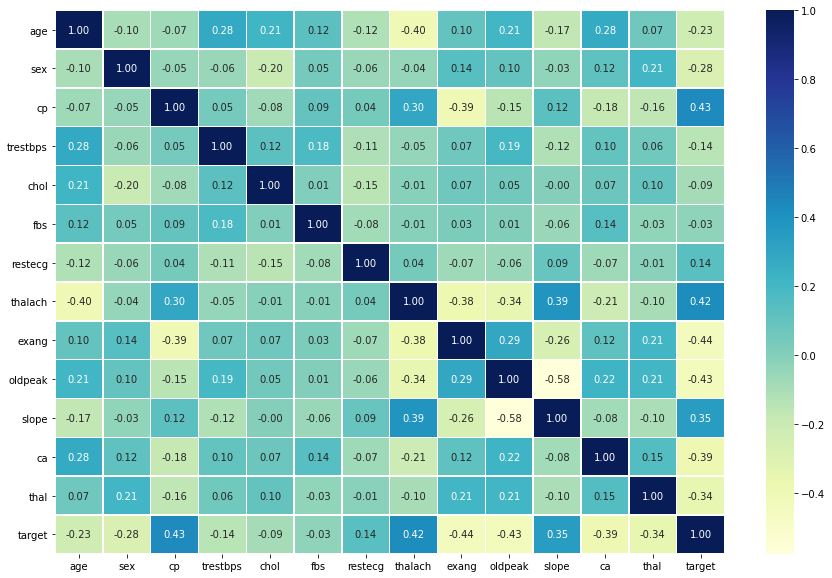

In [18]:
# make corelation matrix more visual
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

In [19]:
## 5. modelling
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# split data into X and Y

X = data.drop("target",axis=1)
Y = data["target"]

X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
## splitting to train and test partitions
np.random.seed(42)
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size=0.2)


In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [24]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [25]:
Y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [26]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

 Data is split into train and test sets.
 training will be done on train set.. and the patterns learned
 on this will be used to make prediction on test set
 
 Going to try 3 machine learning models :
 1. Logistic Regression
 2. K-nearest Neighbours Classifier
 3. Random Forest Classifier

In [27]:
# Put models in adictionary
models = {  "KNN":KNeighborsClassifier(),
          "Logistic Regression":LogisticRegression(solver="liblinear"),
           "Random Forest":RandomForestClassifier()}
# create a function to fit and score models
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    """
    Fits and evaluates given machine learning models .
    models: a dict of differnt Scikit learn classification models
    X_train: training data features
    X_test: test data features
    Y_train: training labels
    y_test: test labels
    """
    
    # set random seed for reproducable results
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit model to data
#         print(name)
        model.fit(X_train,Y_train)
        # evaluate the model and append it to model scores
        model_scores[name] = model.score(X_test,Y_test)
    return model_scores

   

In [28]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test = X_test,
                             Y_train=Y_train,
                             Y_test = Y_test 
                            )
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8688524590163934,
 'Random Forest': 0.8360655737704918}

# Model Comparison

In [29]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare

,KNN,Logistic Regression,Random Forest
accuracy,0.688525,0.868852,0.836066


<AxesSubplot:>

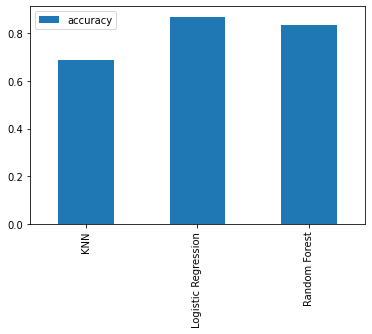

In [30]:
model_compare.T.plot.bar()

### Experimentation Phase
* HyperParameter tuning
* feature importance
* confusion matrix
* cross validation
* precision 
* recall
* F1 score
* classification report
* ROC curve
* Area under Curve (AUC)

### 1. HyperParameter Tuning (By hand)

In [31]:
# Let's tune KNN
train_scores=[]
test_scores =[]

knn = KNeighborsClassifier()

neighbors = range(1,21)

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(X_train,Y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train,Y_train))
    
    # update test score list
    test_scores.append(knn.score(X_test,Y_test))
    

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max Test scores on the test data : 75.41%


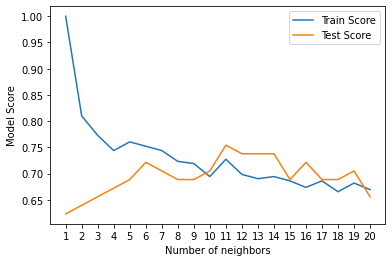

In [34]:
# visualize the scores
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores, label = "Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1,21,1))
plt.legend()
print(f"Max Test scores on the test data : {max(test_scores)*100:.2f}%")

###  HyperParameter Tuning (Using Ranomized Search CV)

Going to tune 
* Logistic regression 
* RandomForestClassifier
... using RandomSearchCV

In [43]:
# create a hyper parameter grid for Logistic Regression
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}

# create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)
          }


In [36]:
# tuning logistic regression .

np.random.seed(42)
# set up random hyperparameter search for logistic regression
rs_log_rg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter=30,
                               verbose=2
                              )
# Fit random hyperparameter search model for Logistic Regression
rs_log_rg.fit(X_train,Y_train)

/home/himanshu/Desktop/heart_disease_project/env/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.9s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... solver=liblinear, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... so

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ......... solver=liblinear, C=0.004832930238571752, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.03359818286283781 .........................
[CV] .......... solver=liblinear, C=0.03359818286283781, total=   0.0s
[CV] solver=liblinear, C=0.03359818286283781 .........................
[CV] .

[CV] ...................... solver=liblinear, C=10000.0, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ...................... solver=liblinear, C=10000.0, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ...................... solver=liblinear, C=10000.0, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ...................... solver=liblinear, C=10000.0, total=   0.0s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [37]:
rs_log_rg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_rg.fit(X_train,Y_train)

/home/himanshu/Desktop/heart_disease_project/env/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... solver=liblinear, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... so

[CV] ........... solver=liblinear, C=29.763514416313132, total=   0.0s
[CV] solver=liblinear, C=78.47599703514607 ...........................
[CV] ............ solver=liblinear, C=78.47599703514607, total=   0.0s
[CV] solver=liblinear, C=78.47599703514607 ...........................
[CV] ............ solver=liblinear, C=78.47599703514607, total=   0.0s
[CV] solver=liblinear, C=78.47599703514607 ...........................
[CV] ............ solver=liblinear, C=78.47599703514607, total=   0.0s
[CV] solver=liblinear, C=78.47599703514607 ...........................
[CV] ............ solver=liblinear, C=78.47599703514607, total=   0.0s
[CV] solver=liblinear, C=78.47599703514607 ...........................
[CV] ............ solver=liblinear, C=78.47599703514607, total=   0.0s
[CV] solver=liblinear, C=206.913808111479 ............................
[CV] ............. solver=liblinear, C=206.913808111479, total=   0.0s
[CV] solver=liblinear, C=206.913808111479 ............................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [40]:
rs_log_rg.score(X_test,Y_test)

0.8852459016393442

In [44]:
# using randomforest classifier

np.random.seed(42)

# setup hyper parameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=50,verbose=2)

rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.3s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.9s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.1s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.9s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.9s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   0.9s
[CV] n_estimators=310, min_samples_split=2, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=310, min_samples_split=2, min_samples_leaf=19, max_depth=5, total=   0.5s
[CV] n_estimators=310, min_samples_split=2,

[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.5s
[CV] n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5 
[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.6s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.5s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.5s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.6s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   1.6s
[CV] n_estimators=910, min_samples_split=18,

[CV]  n_estimators=560, min_samples_split=4, min_samples_leaf=3, max_depth=10, total=   1.0s
[CV] n_estimators=560, min_samples_split=4, min_samples_leaf=3, max_depth=10 
[CV]  n_estimators=560, min_samples_split=4, min_samples_leaf=3, max_depth=10, total=   1.0s
[CV] n_estimators=560, min_samples_split=4, min_samples_leaf=3, max_depth=10 
[CV]  n_estimators=560, min_samples_split=4, min_samples_leaf=3, max_depth=10, total=   1.0s
[CV] n_estimators=560, min_samples_split=4, min_samples_leaf=3, max_depth=10 
[CV]  n_estimators=560, min_samples_split=4, min_samples_leaf=3, max_depth=10, total=   1.0s
[CV] n_estimators=460, min_samples_split=12, min_samples_leaf=17, max_depth=10 
[CV]  n_estimators=460, min_samples_split=12, min_samples_leaf=17, max_depth=10, total=   0.8s
[CV] n_estimators=460, min_samples_split=12, min_samples_leaf=17, max_depth=10 
[CV]  n_estimators=460, min_samples_split=12, min_samples_leaf=17, max_depth=10, total=   0.8s
[CV] n_estimators=460, min_samples_split=12,

[CV]  n_estimators=860, min_samples_split=16, min_samples_leaf=5, max_depth=5, total=   1.5s
[CV] n_estimators=810, min_samples_split=10, min_samples_leaf=11, max_depth=10 
[CV]  n_estimators=810, min_samples_split=10, min_samples_leaf=11, max_depth=10, total=   1.3s
[CV] n_estimators=810, min_samples_split=10, min_samples_leaf=11, max_depth=10 
[CV]  n_estimators=810, min_samples_split=10, min_samples_leaf=11, max_depth=10, total=   1.3s
[CV] n_estimators=810, min_samples_split=10, min_samples_leaf=11, max_depth=10 
[CV]  n_estimators=810, min_samples_split=10, min_samples_leaf=11, max_depth=10, total=   1.4s
[CV] n_estimators=810, min_samples_split=10, min_samples_leaf=11, max_depth=10 
[CV]  n_estimators=810, min_samples_split=10, min_samples_leaf=11, max_depth=10, total=   1.8s
[CV] n_estimators=810, min_samples_split=10, min_samples_leaf=11, max_depth=10 
[CV]  n_estimators=810, min_samples_split=10, min_samples_leaf=11, max_depth=10, total=   1.7s
[CV] n_estimators=160, min_sampl

[CV]  n_estimators=310, min_samples_split=2, min_samples_leaf=1, max_depth=3, total=   0.5s
[CV] n_estimators=310, min_samples_split=2, min_samples_leaf=1, max_depth=3 
[CV]  n_estimators=310, min_samples_split=2, min_samples_leaf=1, max_depth=3, total=   0.5s
[CV] n_estimators=310, min_samples_split=2, min_samples_leaf=1, max_depth=3 
[CV]  n_estimators=310, min_samples_split=2, min_samples_leaf=1, max_depth=3, total=   0.5s
[CV] n_estimators=460, min_samples_split=2, min_samples_leaf=3, max_depth=None 
[CV]  n_estimators=460, min_samples_split=2, min_samples_leaf=3, max_depth=None, total=   0.8s
[CV] n_estimators=460, min_samples_split=2, min_samples_leaf=3, max_depth=None 
[CV]  n_estimators=460, min_samples_split=2, min_samples_leaf=3, max_depth=None, total=   0.8s
[CV] n_estimators=460, min_samples_split=2, min_samples_leaf=3, max_depth=None 
[CV]  n_estimators=460, min_samples_split=2, min_samples_leaf=3, max_depth=None, total=   0.8s
[CV] n_estimators=460, min_samples_split=2, m

[CV]  n_estimators=110, min_samples_split=16, min_samples_leaf=15, max_depth=3, total=   0.2s
[CV] n_estimators=110, min_samples_split=16, min_samples_leaf=15, max_depth=3 
[CV]  n_estimators=110, min_samples_split=16, min_samples_leaf=15, max_depth=3, total=   0.2s
[CV] n_estimators=110, min_samples_split=16, min_samples_leaf=15, max_depth=3 
[CV]  n_estimators=110, min_samples_split=16, min_samples_leaf=15, max_depth=3, total=   0.2s
[CV] n_estimators=110, min_samples_split=16, min_samples_leaf=15, max_depth=3 
[CV]  n_estimators=110, min_samples_split=16, min_samples_leaf=15, max_depth=3, total=   0.2s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [45]:
rs_rf.score(X_test,Y_test)

0.8688524590163934

In [46]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 3}

###  HyperParameter Tuning (Using Grid Search CV)
since our Logistic Regression model provides the best scores so far, trying to improve it further using grid search cv..

In [48]:
# Different hyper parameters for Logistic Regression model
log_reg_grid = {"C":np.logspace(-4,4,50),
               "solver":["liblinear"]}

# set up hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=2)
# fit the grid hyperparameter search model
gs_log_reg.fit(X_train,Y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.00014563484775012445, solver=liblinear ......................
[CV] ....... C=0.00014563484775012445, solver=liblinear, total=   0.0s
[CV] C=0.00014563484775012445, solver=liblinear ......................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.0004498432668969444, solver=liblinear, total=   0.0s
[CV] C=0.0004498432668969444, solver=liblinear .......................
[CV] ........ C=0.0004498432668969444, solver=liblinear, total=   0.0s
[CV] C=0.0004498432668969444, solver=liblinear .......................
[CV] ........ C=0.0004498432668969444, solver=liblinear, total=   0.0s
[CV] C=0.0004498432668969444, solver=liblinear .......................
[CV] ........ C=0.0004498432668969444, solver=liblinear, total=   0.0s
[CV] C=0.0006551285568595509, solver=liblinear .......................
[CV] ........ C=0.0006551285568595509, solver=liblinear, total=   0.0s
[CV] C=0.0006551285568595509, solver=liblinear .......................
[CV] ........ C=0.0006551285568595509, solver=liblinear, total=   0.0s
[CV] C=0.0006551285568595509, solver=liblinear .......................
[CV] ........ C=0.0006551285568595509, solver=liblinear, total=   0.0s
[CV] C=0.0006551285568595509, solver=liblinear .......................
[CV] .

[CV] .......... C=0.12648552168552957, solver=liblinear, total=   0.0s
[CV] C=0.18420699693267145, solver=liblinear .........................
[CV] .......... C=0.18420699693267145, solver=liblinear, total=   0.0s
[CV] C=0.18420699693267145, solver=liblinear .........................
[CV] .......... C=0.18420699693267145, solver=liblinear, total=   0.0s
[CV] C=0.18420699693267145, solver=liblinear .........................
[CV] .......... C=0.18420699693267145, solver=liblinear, total=   0.0s
[CV] C=0.18420699693267145, solver=liblinear .........................
[CV] .......... C=0.18420699693267145, solver=liblinear, total=   0.0s
[CV] C=0.18420699693267145, solver=liblinear .........................
[CV] .......... C=0.18420699693267145, solver=liblinear, total=   0.0s
[CV] C=0.2682695795279725, solver=liblinear ..........................
[CV] ........... C=0.2682695795279725, solver=liblinear, total=   0.0s
[CV] C=0.2682695795279725, solver=liblinear ..........................
[CV] .

[CV] ........... C=24.420530945486497, solver=liblinear, total=   0.0s
[CV] C=24.420530945486497, solver=liblinear ..........................
[CV] ........... C=24.420530945486497, solver=liblinear, total=   0.0s
[CV] C=35.564803062231285, solver=liblinear ..........................
[CV] ........... C=35.564803062231285, solver=liblinear, total=   0.0s
[CV] C=35.564803062231285, solver=liblinear ..........................
[CV] ........... C=35.564803062231285, solver=liblinear, total=   0.0s
[CV] C=35.564803062231285, solver=liblinear ..........................
[CV] ........... C=35.564803062231285, solver=liblinear, total=   0.0s
[CV] C=35.564803062231285, solver=liblinear ..........................
[CV] ........... C=35.564803062231285, solver=liblinear, total=   0.0s
[CV] C=35.564803062231285, solver=liblinear ..........................
[CV] ........... C=35.564803062231285, solver=liblinear, total=   0.0s
[CV] C=51.79474679231202, solver=liblinear ...........................
[CV] .

[CV] ............ C=6866.488450042998, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s
[CV] C=10000.0, solver=liblinear .....................................
[CV] ...................... C=10000.0, solver=liblinear, total=   0.0s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.4s finished


In [52]:
 gs_log_reg.best_params_

{'C': 0.18420699693267145, 'solver': 'liblinear'}

In [54]:
gs_log_reg.params

AttributeError: 'GridSearchCV' object has no attribute 'params'

In [51]:
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

## Evaluating our tuning machine learning classifier beyond accuracy
* ROC curve and AUC score
* Confusion Matrix
* Precision
* Recall
* F1 Score


... (Cross validation should be prefered whereever possible)

To make comparisons and evaluate the trained model, first we need to make predictions

In [61]:
# Make Predictions
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

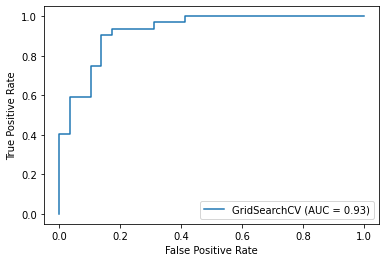

In [62]:
# Plot roc curve
plot_roc_curve(gs_log_reg,X_test,Y_test)

In [64]:
# Confusion matrix
print(confusion_matrix(Y_test,y_preds))

[[25  4]
 [ 3 29]]


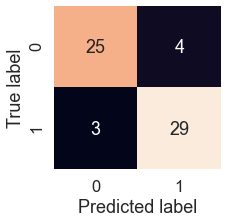

In [66]:
sns.set(font_scale=1.5)

def plot_conf_matrix(Y_test,y_preds):
    """
    Plots a confusion matrix using Seaborn heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
plot_conf_matrix(Y_test,y_preds)

In [67]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### using cross validation split 


In [69]:
gs_log_reg.best_params_

{'C': 0.18420699693267145, 'solver': 'liblinear'}

In [72]:
clf =  LogisticRegression(C =  0.18420699693267145, solver = 'liblinear')

In [75]:
#cross validated accuracy
cv_accuracy = cross_val_score(clf,
                             X,
                             Y,
                             cv=5,
                             scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8446994535519124

In [76]:
#cross validated precision
cv_precision = cross_val_score(clf,
                             X,
                             Y,
                             cv=5,
                             scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [77]:
#cross validated recall
cv_recall = cross_val_score(clf,
                             X,
                             Y,
                             cv=5,
                             scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [78]:
#cross validated f1
cv_f1 = cross_val_score(clf,
                             X,
                             Y,
                             cv=5,
                             scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

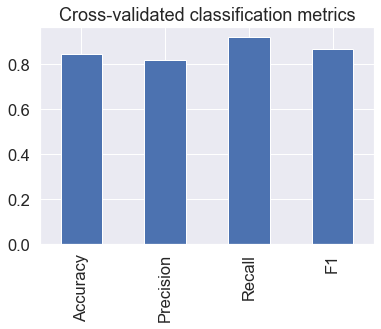

In [81]:
cv_metrics = pd.DataFrame({"Accuracy":cv_accuracy,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                         index=[0]
                         )
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False);